In [70]:
# Libraries
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [71]:
# Train Data
data = pd.read_csv('Train_Data.csv', index_col=False)
# Test Data
df_test = pd.read_csv('Test_Data.csv', index_col=False)

In [5]:
# Total Data
total_data = pd.read_csv('Total_data.csv')
total_data.head()

,Premiums,P(smoker),P(exercise)
0,1.0,0.000685,0.499943
1,1.0,0.002333,0.502201
2,1.0,0.002575,0.499328
3,1.0,0.002989,0.502783
4,1.0,0.003322,0.498667


### 1. Start by graphing the data using only 1 chart, in a meaningful way that captures all the stories in the data. (Be sure to use graphing best practices or marks will be deducted.)

[Text(0.5, 1.0, 'P(exercise) vs P(smoker) vs Premium')]

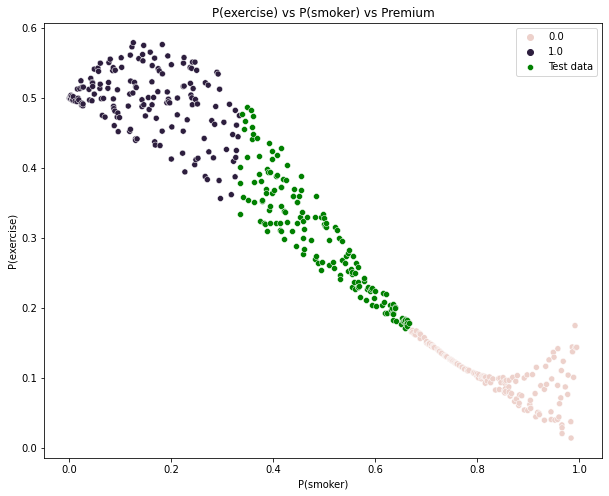

In [6]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(x = 'P(smoker)', y = 'P(exercise)' , data = total_data   ,color = 'r', hue = "Premiums")
sns.scatterplot(x = 'P(smoker)', y = 'P(exercise)' , data = df_test , color = 'g',label = "Test data")
ax.legend()
ax.set(title='P(exercise) vs P(smoker) vs Premium')  

#### The graph says:


1) In this The Vile Insurance company's data company provide high premium insurance in between approximate 0.35 to 0.59 for P(exercise) and 0.0 to 0.38 from P(smoker) and low premium insurance with the range of 0.0 to 0.19 for P(exercise) and more than 0.62 to 1.0 for P(smoker)

2) So from the observation we conclude that when the value of p(excercise) goes high there is more chance of getting high premium and on the other if the value goes down the chances are decreased.

3) Secondly,when we observe the side of p(smoker) we got totally inverse result because in this observation the chance of getting high is when the it goes high and it dipped when it goes down.

4) We observed that in case of high premium we got more scatter points as compare to low premium.

5) When the probability of smoking increases the premium holder policy trends to Low and at the same time, when the probanility of excercise increases the premium holder policy trends to high.

6) Given data provide the information about how the probability of doing  exercise and probability of  being a smoker can effect the satuts of the premium

7) As we can see in the graph if the p(exercise ) increasing  p(premiums) being high also increases. on the other hand we can depicts that as the p(smoker) increases p(premiums) being low increases as well.


8) So p(premium) will be high if the p(smoker ) is low and p(exercise ) is high

9) Also, p(premium) will be low if the p(smoker ) is high and p(exercise ) is low

10) There are two independent variable P(smoker) and P(exercise) both are negatively corelated.

11) When we look at the graph, we can directly see that, the when the probability increases the premium poplicy becomes high and when the probability of excercise increases then the premium policy becomes low. 

### 2. Describe the data set in detail, and note any stories the data is telling you.  Be sure to explain why you think there are any patterns.  Don't be afraid to conjecture (make guesses), but make sure you can explain any peculiarities (oddities) in the data.

In [7]:
# Train Data
data.shape
# There are 326 observations in our data

(326, 3)

In [8]:
# Checking for the presence of null values in the given data.
data.isnull().sum()

Premiums       0
P(smoker)      0
P(exercise)    0
dtype: int64

In [9]:
# There is no null value in our model, so we can proceed with the data.

#### Checking the presence of outliers

In [10]:
data['P(smoker)'].max(),data['P(smoker)'].min(),

(0.99459829, 0.000684727)

In [11]:
data['P(exercise)'].max(),data['P(exercise)'].min(),

(0.579183592, 0.014029906)

There is no evident outliers in the given data

#### Checking the data is Imbalanced or not.

In [12]:
data['Premiums'].value_counts()

1    164
0    162
Name: Premiums, dtype: int64

 The given data is not imbalanced, only two observation is extra for the class high premium. 

### Considering the train dataset

In [13]:
data.groupby('Premiums').mean()

,P(smoker),P(exercise)
Premiums,,
0,0.82719,0.106843
1,0.15324,0.494535


From the above table we can see that, the average probability of the high premium policy holder who has the smoking habit is 0.15 and the average probaility of high premium ploicy who has excercise habit is 0.49. At the same time the average probability of low premium policy who has the smoking habit is 0.83 and the average probaility of low premium policy holder who has excercise habit is 0.106.

Therefore, we can derive from the above information that, if a premium holder has high probililty of smoking then the chance to become a low premium policy holder is high compairing with a premium holder who has low probability of smokiing. In the case of excercise, if a premium holder has low probability of excercising then there is chance to become that holder as a low premium policy holder. 

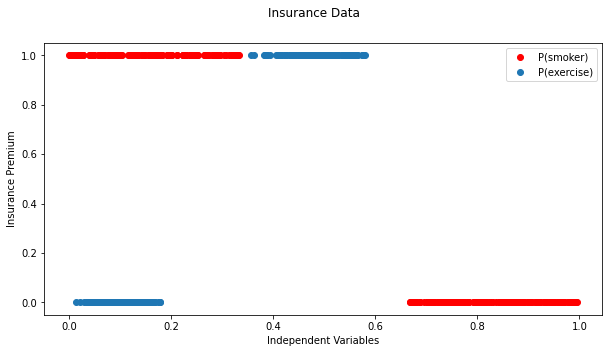

In [14]:
plt.figure(figsize=(10,5))
plt.suptitle('Insurance Data')
plt.xlabel('Independent Variables')
plt.ylabel('Insurance Premium')
plt.scatter(data['P(smoker)'],data['Premiums'], color = 'r')
plt.scatter(data['P(exercise)'],data['Premiums'])
plt.legend(['P(smoker)','P(exercise)'], loc='best')

In [15]:
High = data[data['Premiums'] == 1]
Low = data[data['Premiums']== 0]

In [16]:
Low.head(), High.head()

(     Premiums  P(smoker)  P(exercise)
 164         0   0.667237     0.177666
 165         0   0.667385     0.178990
 166         0   0.670940     0.165759
 167         0   0.672410     0.167903
 168         0   0.673401     0.164987,
    Premiums  P(smoker)  P(exercise)
 0         1   0.000685     0.499943
 1         1   0.002333     0.502201
 2         1   0.002575     0.499328
 3         1   0.002989     0.502783
 4         1   0.003322     0.498667)

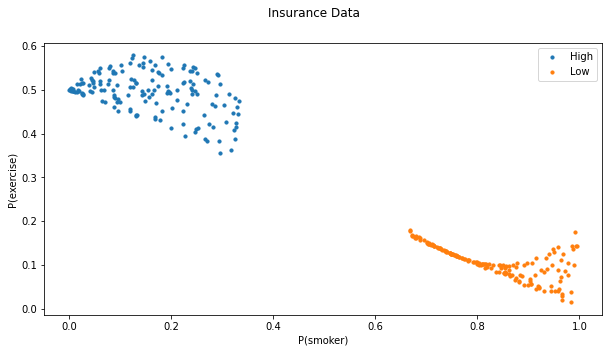

In [17]:
plt.figure(figsize=(10,5))
plt.suptitle('Insurance Data')
plt.xlabel('P(smoker)')
plt.ylabel('P(exercise)')
plt.scatter(High.iloc[:, 1], High.iloc[:, 2], s=10, label='High')
plt.scatter(Low.iloc[:, 1], Low.iloc[:, 2], s=10, label='Low')
plt.legend()
plt.show()

### Inefernce from the graph

The depicted data is the classification, as the target value comprises of two values high and low. We have selected the scatter plot as it shows two bins and justify those two classes are easily seperable, beacuse there is clear and long seperation between the two classes. 

From the above table we can see that, the average probability of the high permium policy holder who has the smoking habit is 0.15 and the average probaility of high premium ploicy who has excercise habit is 0.49. At the same time the average probability of low premium policy who has the smoking habit is 0.83 and the average probaility of low premium policy holder who has excercise habit is 0.106.

Therefore, we can derive from the above information that, if a premium holder has high probililty of smoking then the chance to become a low premium policy holder is high compairing with a premium holder who has low probability of smokiing. In the case of excercise, if a premium holder has low probability of excercising then there is chance to become that holder as a low premium policy holder.

We have aslo mentioned the data features when aswering the question number 1.

### 3. Using the existing data, create a classifier model, and graph the output using best practices.  Be sure to explain/justify why you chose your model. 

Model : Logistic Regression

From the train data, the target values are high and low. This is a binary classification problem. Rather than going to complex alogrithms and being in the limits of course content, we opted for logistic regression and from the scatter plot of train data and also there were no outliers, the data was clean and a decision boundary can divide the data into two classes. Also while seeing the train data we observed that there is a respective distance between both the bins. 
So, we are using binary logistic regression.

We approximating 



f(w,b) = wX + b 



to the sigmoid function, 



S =  1/(1 + e^-(wX + b))

### Preparing the data before model building

In [89]:
# Train dataset with 70% data
data_train = data.sample(frac = 0.7, random_state = 39)

# Creating dataframe with rest of the 30% values
data_test = data.drop(data_train.index)

In [90]:
data_test.head()

,Premiums,P(smoker),P(exercise)
0,1,0.000685,0.499943
1,1,0.002333,0.502201
4,1,0.003322,0.498667
11,1,0.011739,0.495646
12,1,0.015465,0.495000


In [91]:
data_train.head()

,Premiums,P(smoker),P(exercise)
272,0,0.878351,0.103355
207,0,0.748438,0.125785
198,0,0.737838,0.131110
214,0,0.757314,0.121441
68,1,0.124980,0.507229


In [92]:
# We splitted the data as X train , Y train, X test and Y test
X_train = data_train[['P(smoker)','P(exercise)']]
X_test = data_test[['P(smoker)','P(exercise)']]
y_train = data_train[['Premiums']]
y_test = data_test[['Premiums']]
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((228, 2), (98, 2), (228, 1), (98, 1))

In [93]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [94]:
X_train = X_train.T
y_train = y_train.reshape(1, X_train.shape[1])
X_test = X_test.T
y_test = y_test.reshape(1, X_test.shape[1])

In [95]:
print("Dimensions of X_train dataset : ", X_train.shape)
print("Dimensions of Y_train dataset: ", y_train.shape)
print("Dimensions of X_test dataset: ", X_test.shape)
print("Dimensions of Y_test dataset: ", y_test.shape)

Shape of X_train :  (2, 228)
Shape of Y_train :  (1, 228)
Shape of X_test :  (2, 98)
Shape of Y_test :  (1, 98)


In [96]:
# Sigmoid function
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [151]:
def LogisticRegression(X, Y, learning_rate, iterations):
    
    m = X_train.shape[1]
    n = X_train.shape[0]
    
    # Initializing with n zeros matrix
    W = np.zeros((n,1))
    
    # Single parameter
    B = 0
    
    cost_list = []
    
    for i in range(iterations):
        
        Z = np.dot(W.T, X) + B
        A = sigmoid(Z)
        # Creating the cost function
        cost = -(1/m)*np.sum( Y*np.log(A) + (1-Y)*np.log(1-A))
        
        # Creating Gradient Descent
        dW = (1/m)*np.dot(A-Y, X.T)
        dB = (1/m)*np.sum(A - Y)
        
        W = W - learning_rate*dW.T
        B = B - learning_rate*dB
        
        # Updating or append the cost function at every time 
        cost_list.append(cost)
        
        if(i%(iterations/10) == 0):
            print("cost value after ", i, "iterations is : ", cost)
        
    return W, B, cost_list

In [184]:
iterations = 100000
learning_rate = 0.0015
W, B, cost_list = LogisticRegression(X_train, y_train, learning_rate = learning_rate, iterations = iterations)

cost value after  0 iterations is :  0.6931471805599453
cost value after  10000 iterations is :  0.3726926851957252
cost value after  20000 iterations is :  0.24644231128948266
cost value after  30000 iterations is :  0.18295483733087317
cost value after  40000 iterations is :  0.145492856654168
cost value after  50000 iterations is :  0.12093309886792297
cost value after  60000 iterations is :  0.10362569003796684
cost value after  70000 iterations is :  0.09077813720544499
cost value after  80000 iterations is :  0.08086216559572378
cost value after  90000 iterations is :  0.07297419687330871


In [185]:
W,B

(array([[-6.14794534],
        [ 4.60191201]]),
 1.5560062618600041)

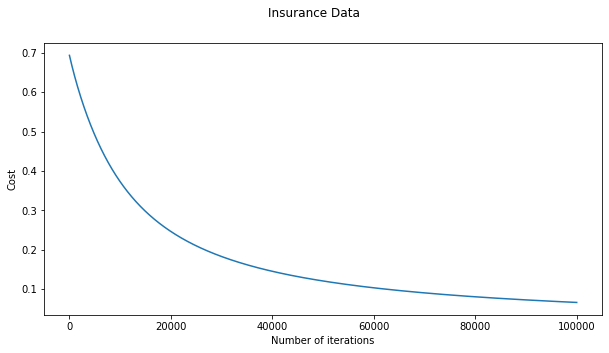

In [186]:
plt.figure(figsize=(10,5))
plt.suptitle('Insurance Data')
plt.xlabel('Number of iterations')
plt.ylabel('Cost')
plt.plot(np.arange(iterations), cost_list)
plt.show()

In [266]:
def accuracy(X, Y, W, B,cutoff):
    
    Z = np.dot(W.T, X) + B
    A = sigmoid(Z)
    A1 = A > cutoff
    
    A1 = np.array(A1, dtype = 'int64')
    
    
    acc = (1 - np.sum(np.absolute(A1 - Y))/Y.shape[1])*100
    
    print("Accuracy of the model is : ", round(acc, 2), "%")
    

def predict(X, W, B,cutoff):
    
    linear_model = np.dot(W.T, X) + B
    
    y_predicted = sigmoid(linear_model)
    print(y_predicted)
    
    y_predicted = y_predicted > cutoff
    
    y_predicted_cls = np.array(y_predicted, dtype = 'int64')
    
    return np.array(y_predicted_cls)

In [201]:
accuracy(X_test, y_test, W, B,0.5)

Accuracy of the model is :  100.0 %


In [207]:
predict(X_test, W, B,0.5)

[[0.97921444 0.9792196  0.97876002 0.97735147 0.97677151 0.97652346
  0.97790034 0.97335143 0.97688505 0.97602431 0.97206007 0.9727019
  0.96587862 0.96892332 0.96438852 0.96934134 0.9738517  0.97140825
  0.95972818 0.96777268 0.96188051 0.96883558 0.96916447 0.95977784
  0.94202307 0.94143287 0.95806573 0.94098663 0.96360655 0.9511073
  0.94810679 0.95101391 0.92676868 0.93548929 0.95024352 0.95633602
  0.94745517 0.93392978 0.93421767 0.92771279 0.92812912 0.90814583
  0.93090062 0.91753737 0.86054629 0.87974412 0.84874775 0.88442101
  0.90432776 0.86211829 0.81711842 0.84051529 0.13886227 0.12890998
  0.10901781 0.10972848 0.10292362 0.1020721  0.09353517 0.07916457
  0.07819948 0.07731001 0.07262761 0.07197305 0.06391384 0.06352519
  0.06084693 0.06048502 0.05213049 0.04995016 0.04867806 0.04560519
  0.04562583 0.03912892 0.04057587 0.03853806 0.03449431 0.03708638
  0.0330433  0.03178204 0.02916467 0.0289768  0.02706767 0.02781567
  0.03026632 0.0298383  0.02317528 0.02412123 0.02

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

Here we can see that predicted sigmoid probabilities are given above so when the probabilities greater than the cut off it will be consider as the high premium policy as 1 and else it will be consider as the low premium as 0.

So we build the model with the gradient descent to get the optimised weight and biase, then converting that linear eqaution to the sigmoid function through the equation 1/(1 + e^-(wX + b)) then the calculated probabilities would be cutoff with respect to the cut off value into high and low premiums. 

### 4. Retune your model parameters to ensure you get a good model output, and discuss the tuning.

In [166]:
iterations = 10
learning_rate = 0.01
W, B, cost_list = LogisticRegression(X_train, y_train, learning_rate = learning_rate, iterations = iterations)
accuracy(X_test, y_test, W, B,0.5)

cost value after  0 iterations is :  0.6931471805599453
cost value after  1 iterations is :  0.6927693215390193
cost value after  2 iterations is :  0.6923919741028843
cost value after  3 iterations is :  0.6920151362896041
cost value after  4 iterations is :  0.6916388061488308
cost value after  5 iterations is :  0.6912629817417378
cost value after  6 iterations is :  0.6908876611409493
cost value after  7 iterations is :  0.6905128424304724
cost value after  8 iterations is :  0.6901385237056289
cost value after  9 iterations is :  0.6897647030729877
Accuracy of the model is :  89.8 %


In [167]:
iterations = 100
learning_rate = 0.01
W, B, cost_list = LogisticRegression(X_train, y_train, learning_rate = learning_rate, iterations = iterations)
accuracy(X_test, y_test, W, B,0.5)

cost value after  0 iterations is :  0.6931471805599453
cost value after  10 iterations is :  0.6893913786502959
cost value after  20 iterations is :  0.685685019735042
cost value after  30 iterations is :  0.682026291803965
cost value after  40 iterations is :  0.678413486867195
cost value after  50 iterations is :  0.674844994799622
cost value after  60 iterations is :  0.6713192975096683
cost value after  70 iterations is :  0.6678349634208046
cost value after  80 iterations is :  0.6643906422538443
cost value after  90 iterations is :  0.660985060097845
Accuracy of the model is :  92.86 %


In [178]:
iterations = 100000
learning_rate = 0.001
W, B, cost_list = LogisticRegression(X_train, y_train, learning_rate = learning_rate, iterations = iterations)
accuracy(X_test, y_test, W, B,0.5)

cost value after  0 iterations is :  0.6931471805599453
cost value after  10000 iterations is :  0.4449512401457047
cost value after  20000 iterations is :  0.319142631595066
cost value after  30000 iterations is :  0.24644358223665194
cost value after  40000 iterations is :  0.20017693844745008
cost value after  50000 iterations is :  0.16846976093986954
cost value after  60000 iterations is :  0.14549356040146388
cost value after  70000 iterations is :  0.12811843633383094
cost value after  80000 iterations is :  0.11453366453878534
cost value after  90000 iterations is :  0.10362612547149318
Accuracy of the model is :  100.0 %


In [177]:
iterations = 100
learning_rate = 0.001
W, B, cost_list = LogisticRegression(X_train, y_train, learning_rate = learning_rate, iterations = iterations)
accuracy(X_test, y_test, W, B,0.1)

cost value after  0 iterations is :  0.6931471805599453
cost value after  10 iterations is :  0.6927694365867181
cost value after  20 iterations is :  0.6923922033169483
cost value after  30 iterations is :  0.6920154787967349
cost value after  40 iterations is :  0.6916392610836988
cost value after  50 iterations is :  0.6912635482469129
cost value after  60 iterations is :  0.6908883383668352
cost value after  70 iterations is :  0.6905136295352401
cost value after  80 iterations is :  0.6901394198551501
cost value after  90 iterations is :  0.68976570744077
Accuracy of the model is :  53.06 %


In [171]:
iterations = 100
learning_rate = 0.1
W, B, cost_list = LogisticRegression(X_train, y_train, learning_rate = learning_rate, iterations = iterations)
accuracy(X_test, y_test, W, B,0.9)

cost value after  0 iterations is :  0.6931471805599453
cost value after  10 iterations is :  0.6575342751166449
cost value after  20 iterations is :  0.6256523851327025
cost value after  30 iterations is :  0.5966082962491125
cost value after  40 iterations is :  0.5698792551920042
cost value after  50 iterations is :  0.5451347453791415
cost value after  60 iterations is :  0.5221451987655572
cost value after  70 iterations is :  0.5007359611303386
cost value after  80 iterations is :  0.48076419895430855
cost value after  90 iterations is :  0.4621072560728943
Accuracy of the model is :  46.94 %


In [176]:
iterations = 1000
learning_rate = 0.0001
W, B, cost_list = LogisticRegression(X_train, y_train, learning_rate = learning_rate, iterations = iterations)
accuracy(X_test, y_test, W, B,0.6)

cost value after  0 iterations is :  0.6931471805599453
cost value after  100 iterations is :  0.6927694480769432
cost value after  200 iterations is :  0.6923922262095098
cost value after  300 iterations is :  0.6920155130045447
cost value after  400 iterations is :  0.6916393065204619
cost value after  500 iterations is :  0.6912636048271221
cost value after  600 iterations is :  0.6908884060057634
cost value after  700 iterations is :  0.6905137081489339
cost value after  800 iterations is :  0.690139509360424
cost value after  900 iterations is :  0.6897658077551985
Accuracy of the model is :  46.94 %


In [182]:
iterations = 1000
learning_rate = 0.0001
W, B, cost_list = LogisticRegression(X_train, y_train, learning_rate = learning_rate, iterations = iterations)
accuracy(X_test, y_test, W, B,0.45)

cost value after  0 iterations is :  0.6931471805599453
cost value after  100 iterations is :  0.6927694480769432
cost value after  200 iterations is :  0.6923922262095098
cost value after  300 iterations is :  0.6920155130045447
cost value after  400 iterations is :  0.6916393065204619
cost value after  500 iterations is :  0.6912636048271221
cost value after  600 iterations is :  0.6908884060057634
cost value after  700 iterations is :  0.6905137081489339
cost value after  800 iterations is :  0.690139509360424
cost value after  900 iterations is :  0.6897658077551985
Accuracy of the model is :  53.06 %


#### We have retuned our model with different parameters like learning rate, number of iteration and the cutoff value of the classifier. From the above different combinations we have calculated that the optimum learning rate is 0.0015, number of iteration is 100000 and the cutoff value is 0.5. Beacuse many of the time the model performs very well exactly 100 percentage, while test it with the training data we are concluding to this values for the rest of our model.

### 5. Prove and explain why the model is converging.

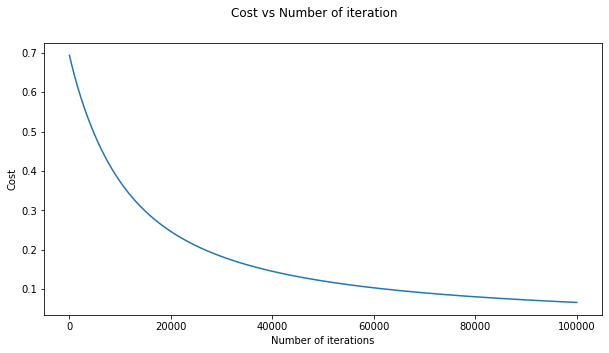

In [188]:
plt.figure(figsize=(10,5))
plt.suptitle('Cost vs Number of iteration')
plt.xlabel('Number of iterations')
plt.ylabel('Cost')
plt.plot(np.arange(iterations), cost_list)
plt.show()

#### From the above cost vs number of iteration graph we can cleraly see the model is converging to the high number of iteration. Also when we tried with different combination of learning rate, number of iteration and the cut off value, and conculuded to the point that the learning rate is 0.0015, number of iteration is 100000 and the cutoff value is 0.5 will give the better accuracy in overall.

### 6. Come up with ten  different measures to classify how well your model performs, then explain the results.

In [317]:
def predict(X, W, B,cutoff):
    
    linear_model = np.dot(W.T, X) + B
    
    y_predicted = sigmoid(linear_model)
    
    y_predicted = y_predicted > cutoff
    
    y_predicted_cls = np.array(y_predicted, dtype = 'int64')
    
    return y_predicted_cls

In [241]:
data_test.shape

(98, 3)

In [257]:
predict(X_test, W, B,0.5).T.shape

(98, 1)

In [320]:
data_test['y_predicted'] = predict(X_test, W, B,0.5).T

In [321]:
data_test.head()

,Premiums,P(smoker),P(exercise),y_predicted,y_predicted_prob
0,1,0.000685,0.499943,1,0.979214
1,1,0.002333,0.502201,1,0.979220
4,1,0.003322,0.498667,1,0.978760
11,1,0.011739,0.495646,1,0.977351
12,1,0.015465,0.495000,1,0.976772


### 1. Confusion Matrix

In [260]:
truepositive = len(data_test[(data_test['Premiums']==1) & (data_test['y_predicted']==1)])
truenegative = len(data_test[(data_test['Premiums']==0) & (data_test['y_predicted']==0)])
falsenegative = len(data_test[(data_test['Premiums']==1) & (data_test['y_predicted']==0)])
falsepositive = len(data_test[(data_test['Premiums']==0) & (data_test['y_predicted']==1)])
total = truepositive + falsepositive +truenegative +falsenegative
t = total
confusion_matrix = np.array([[truenegative,falsenegative],[falsepositive,truepositive]])

<AxesSubplot:>

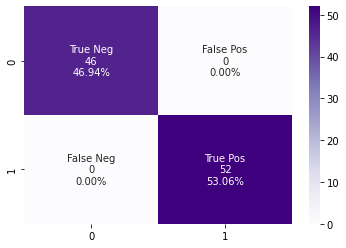

In [261]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in confusion_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in confusion_matrix.flatten()/np.sum(confusion_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Purples')

In [262]:
print(confusion_matrix)

[[46  0]
 [ 0 52]]


Confusion Matrix is the first measure that we have used to check that how well our model is performing to predict the y values in test data.
Interpretation:-
1. True Positive = 52 of the Premium values are actual high and we predited them as high
2. True Negative = 46 of the Premium values are actual low and we predicted them as low
3. False Positive = There is 0 value of the Premium is low and we predicted as high
4. False Negative = There is 0  value of Premium high that we predicted as low

The percentage in the grapgh is the percentage of the data. 46.94 are High and rest is Low in the full test datset.

### 2. Precision 

In [270]:
precision = (truepositive/(truepositive + falsepositive))*100 

print("Precision Value is: " + str(precision))

Precision Value is: 100.0


100% of the positive indentifications are actually correct as there is no false positive in our model. Higher is always better. 

### 3. Accuracy

In [267]:
def accuracy(X, Y, W, B,cutoff):
    
    Z = np.dot(W.T, X) + B
    A = sigmoid(Z)
    A1 = A > cutoff
    
    A1 = np.array(A1, dtype = 'int64')
    
    
    acc = (1 - np.sum(np.absolute(A1 - Y))/Y.shape[1])*100
    
    print("Accuracy of the model is : ", round(acc, 2), "%")

In [268]:
accuracy(X_test, y_test, W, B,0.5)

Accuracy of the model is :  100.0 %


Accuracy tells how many times the model was correct in overall. Here it is 100, so 100 times out of 100 we have the correctly predicted. Higher is always better.

### 3. F1 Score

In [274]:
f1_score = (2 * precision *recall)/(precision+recall)

print("F1 Score is: " + str(f1_score))


F1 Score is: 100.0


We got 100% F1 Score which means it is the harmonic mean of classifiers recall and precision, means it is used to compare the Effectiveness of two classifiers . the number 100% means that the values of precision and recall is higher thats why we are getting F1 Score higher. Higher is always better.

### 4. Senisitivity

In [302]:
sensitivity = (truepositive/(truepositive + falsenegative))*100

print("Sensitivity is: " + str(sensitivity))

Sensitivity is: 100.0


#### Recall is same as Sensitivity

In [272]:
recall = (truepositive/(truepositive + falsenegative))*100
print("Recall Value is: " + str(recall))

Recall Value is: 100.0


Sensitivity refers as how much model can recognize successful cases , in this project our Sensitivity is 100% means our model can predict this much of successful cases. The value is high or low which one is better will be dertmined by the aim of the project. Sensitivity is the aility to detect the disease if the disease is actually present. In our case the model detcting the High as High very accurately.


### 5. Specificity

In [303]:
specificity =(truenegative/(truenegative + falsepositive))*100

print("Specificity is: " + str(specificity))


Specificity is: 100.0


Specificity means how much true negative values our model is successfully recognizing, as in this project 100% true negative values are predicted by our model. Specificity is the ability to detect the absence of the disease if the disease is actually absent. In our case the not high that is Low is detecting as Low with 100 percentage accurately.


### 6. Misclassification

In [275]:
misclassification = ((falsepositive + falsenegative)/t)*100
print("Misclassification Value is: " +  str(misclassification))

Misclassification Value is: 0.0


This measure how frequently the classifier produced inaccurate results , which means 0 % of results are inaccurately predicted by our  model. Lesser is the better model.

### 7. Prevalence

In [276]:
prevalence = ((truepositive + falsenegative)/t)*100
print("Prevalence Value is: " +  str(prevalence))

Prevalence Value is: 53.06122448979592


Prevalence Value = This is an indicator of the percentage of the sample's overall YES responses. we got 53.06% means the YES /positive responses are only 53.06%.

### 8. Null Error Rate

In [277]:
nullerrorrate = ((truenegative + falsepositive)/t)*100


print("Null Error Rate is: " + str(nullerrorrate))


Null Error Rate is: 46.93877551020408


This is the degree to which the classifier would be inaccurate and it only predicted 46.93877551020408 % of the majority class.

### 9.Postive and Negative Predictive values

In [374]:
# Postive predictive value
Postive_predictive_value = truepositive/(truepositive+falsepositive)
Postive_predictive_value

1.0

In [375]:
# Negative predictive value
Negative_predictive_value = truenegative/(truenegative+falsenegative)
Negative_predictive_value

1.0

Here the positive and negative predictive values are 100% or 1. Positive predictive value will tell you the odds you having a disease if you have a postive result. Here it is 100.
The negative preditive value will tells you the probaility of a person get negative result when the person acctually do not have the disease. Here it is also 100%. 

### 10. Balanced accuracy

In [304]:
balancedaccuracy = ((specificity + sensitivity)/2)
balancedaccuracy

100.0

It's the average of sensitivity and specificity. This uses in the imbalanced data.

### 7. Explain how this is an example of scaling up an ML model.

Scaling are different types, the automation of the code, the scaling up of the features or even the number of observations. Here we are dealing it with the observation. When we look at the features in this data, we can see that the features are gievn in the probabilities. Scaling of a feature really means, we are standardising the features in to a particular range to easily interpret and easily accessablw by the model to find the realation ship between the features to the objective. Here the two variables are in probabilities so the range is 0 to 1. So in this perspetive we can consider this model as an example of scaling model. 

Also scaling means, the model should run every where with the same accuracy. The model should be easily accessable and useful for every one at every where. Here we tried with many data sets, firstly we build the model in the train data set and tested on the test data then the accuracy is 100 % , there after we tested with the tested data itself and combined every data together to get a general model performance accuracy, there also we got the exact 100% accuracy. which shows that the model performs exactly very well in every datasets.

So when we standardizing the features then it means we noramilising the effect of each features which occured by the values, if the value changes in different features in different ranges then it would be very difficult to interpret and difficult for the moodel to get approroate information from the data.

### 8. Explain how gender affects this model.
There is no column as gender, but when we see a person who is smoking and exercising less has to pay low premium and if a person who is not smoking and exercising more has to pay premium high which is contadicting, so there are some factors which if added can make this meaningful. Here one such factor can be gender as , it is indirectly affecting the model as smoking and gender are directly affecting as male smokers increase the premium by 10 %. Also, So there is some correation between smoking feature and gender feature. If the probablity of smoker is change then it will effect our decision classifer as the probablity of smoker is effected by the gender then any change in the gender data like if gender is male it is effective our probablity of our smoker class which effect decision classifer.

### 9. Using the tuned model you already built, reapply it including the new testing data, and discuss the results. (Is it good Does it need retuning?)

In [328]:
test_data = pd.read_csv('Test_Data.csv')
test_data.head()

,P(smoker),P(exercise)
0,0.334847,0.334546
1,0.334960,0.400981
2,0.335459,0.378434
3,0.337949,0.477065
4,0.341565,0.358447


In [329]:
test_predictions = test_data.values

In [331]:
test_predictions = test_predictions.T

In [335]:
test_data['Premiums'] = predict(test_predictions, W, B,0.5).T

In [336]:
test_data

,P(smoker),P(exercise),Premiums
0,0.334847,0.334546,1
1,0.334960,0.400981,1
2,0.335459,0.378434,1
3,0.337949,0.477065,1
4,0.341565,0.358447,1
...,...,...,...
161,0.659822,0.176518,0
162,0.661749,0.183025,0
163,0.661837,0.179130,0
164,0.662886,0.174768,0


In [337]:
High_Test = test_data[test_data['Premiums'] == 1]
Low_Test = test_data[test_data['Premiums']== 0]

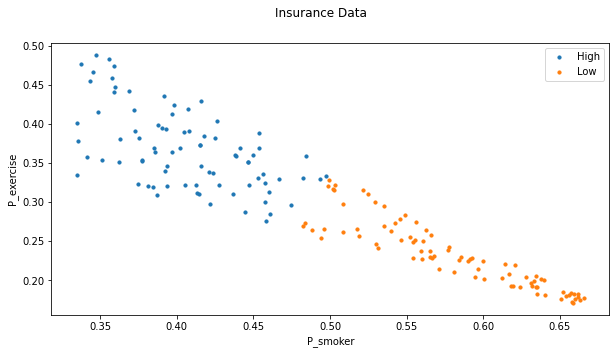

In [338]:
plt.figure(figsize=(10,5))
plt.suptitle('Insurance Data')
plt.xlabel('P_smoker')
plt.ylabel('P_exercise')
plt.scatter(High_Test.iloc[:, 0], High_Test.iloc[:, 1], s=10, label='High')
plt.scatter(Low_Test.iloc[:, 0], Low_Test.iloc[:, 1], s=10, label='Low')
plt.legend()
plt.show()

### About the results

Here also we are getting a similar result what our train data tells, like, when the probability of smoking decreases then the premium policy will become low and when the probability of excercise increases then the premium policy will become high. 

So far the model performs good, however we can increase the model performance by retuning the with high number of interations and less learning rates, but it needs more time and bigger machines. 

### 10. Rebuild the model using ALL the data and discuss the results by comparing/contrasting.  Can you explain why the company should be allowed or not to use a probabilistic classifier?

In [340]:
Final_Data = pd.concat([data,test_data])
Final_Data.head()

,Premiums,P(smoker),P(exercise)
0,1,0.000685,0.499943
1,1,0.002333,0.502201
2,1,0.002575,0.499328
3,1,0.002989,0.502783
4,1,0.003322,0.498667


In [341]:
Final_Data.shape

(492, 3)

In [342]:
High_Final_Data = Final_Data[Final_Data['Premiums'] == 1]
Low_Final_Data = Final_Data[Final_Data['Premiums']== 0]

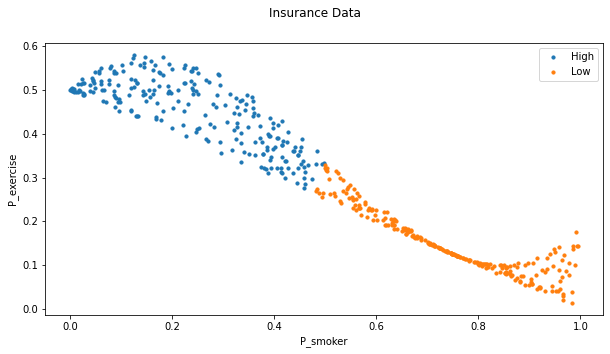

In [343]:
plt.figure(figsize=(10,5))
plt.suptitle('Insurance Data')
plt.xlabel('P_smoker')
plt.ylabel('P_exercise')
plt.scatter(High_Final_Data.iloc[:, 1], High_Final_Data.iloc[:, 2], s=10, label='High')
plt.scatter(Low_Final_Data.iloc[:, 1], Low_Final_Data.iloc[:, 2], s=10, label='Low')
plt.legend()
plt.show()

#### Inference from the graph
This is the entire data, the train data and the test data with the predicted y. Here also we can see seperation and the trend which we have seen before, for the high probability of smoking as low premium and for high probability of excercise as high premium. 


#### Model with full data

In [360]:
# Train dataset with 70% data
Final_Data_train = Final_Data.sample(frac = 0.7, random_state = 132)

# Creating dataframe with rest of the 50% values
Final_Data_test = Final_Data.drop(data_train.index)
Final_Data_train.head(),Final_Data_test.head()

(     Premiums  P(smoker)  P(exercise)
 317         0   0.977805     0.103986
 123         1   0.238745     0.504384
 307         0   0.959705     0.044057
 9           1   0.007414     0.497220
 22          1   0.377298     0.352711,
     Premiums  P(smoker)  P(exercise)
 0          1   0.000685     0.499943
 1          1   0.002333     0.502201
 4          1   0.003322     0.498667
 11         1   0.011739     0.495646
 12         1   0.015465     0.495000)

In [361]:
X_train_Full = Final_Data_train[['P(smoker)','P(exercise)']]
X_test_Full = Final_Data_test[['P(smoker)','P(exercise)']]
y_train_Full = Final_Data_train['Premiums'].values
y_test_Full = Final_Data_test['Premiums'].values
X_train_Full.shape,X_test_Full.shape,y_train_Full.shape,y_test_Full.shape

((344, 2), (150, 2), (344,), (150,))

In [363]:
X_train_Full_ = X_train_Full.values
X_test_Full_ = X_test_Full.values
X_train_Full_ = X_train_Full_.T
X_test_Full_ = X_test_Full_.T

In [368]:
y_train_Full = y_train_Full.reshape(1, X_train_Full_.shape[1])
y_test_Full = y_test_Full.reshape(1, X_test_Full_.shape[1])

In [364]:
X_test_Full['Premiums'] = predict(X_test_Full_, W, B,0.5).T

In [369]:
def accuracy(X, Y, W, B,cutoff):
    
    Z = np.dot(W.T, X) + B
    A = sigmoid(Z)
    A1 = A > cutoff
    
    A1 = np.array(A1, dtype = 'int64')
    
    acc = (1 - np.sum(np.absolute(A1 - Y))/Y.shape[1])*100
    
    print("Accuracy of the model is : ", round(acc, 2), "%")

In [370]:
accuracy(X_test_Full_, y_test_Full, W, B,0.5)

Accuracy of the model is :  100.0 %


In [371]:
High_X_test_Full = X_test_Full[X_test_Full['Premiums'] == 1]
Low_X_test_Full = X_test_Full[X_test_Full['Premiums']== 0]

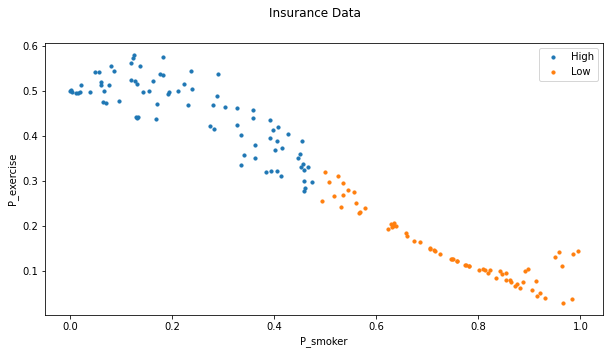

In [372]:
plt.figure(figsize=(10,5))
plt.suptitle('Insurance Data')
plt.xlabel('P_smoker')
plt.ylabel('P_exercise')
plt.scatter(High_X_test_Full.iloc[:, 0], High_X_test_Full.iloc[:, 1], s=10, label='High')
plt.scatter(Low_X_test_Full.iloc[:, 0], Low_X_test_Full.iloc[:, 1], s=10, label='Low')
plt.legend()
plt.show()

Therefore from the graph we can see that the cut off is alsmot smiliar to what we are getting through out the project. So the data is perfect and the model performs very well in all the cases. Here also we are getting the same accuracy. Which means our model performs very well with this data.





 We can also conclude that the probabilistic approach is can be allowed to the comapnies. 